# 연관분석

## 네이버 지식인 데이터로 크롤링해서 단어 추천하기

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "association_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
        
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
from bs4 import BeautifulSoup
import urllib
import time
import requests
from tqdm import tqdm_notebook

present_candi_text = [] # 문자열 저장할 리스트 

html = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=데이터분석&start='
for n in range(1, 1000, 10):
    target=html+str(n)
    response = requests.get(target)
    soup = BeautifulSoup(response.text, "html.parser")
    tmp = soup.select('div.question_area > div.question_group > a')
    for line in tmp:
        #print(line.text)
        present_candi_text.append(line.text)
    time.sleep(0.5)
for i in present_candi_text:
    print(i)

컴활 못하는데 데이터분석가 데이터분석가로 직무전환하려고 마음먹었는데요 그전에 컴활 1급 실기 따놓으려고 2~3달 공부하고 6번 시험봤는데 다 떨어졌네요 진짜 하루종일 공부했는데.. 데이터분석 국비지원 신청해두었는데 컴활이 이러니 용기가 안생겨요. 컴활 못해도 데이터분석은 할 수 있을까요?
빅데이터 분석가 고3 학과 고민중인데 인공지능학과에서 빅데이터 분석가를 준비해도 괜찮을까요? 원래 통계학과를 가려했지만 교육과정을 보니 인공지능학과가 저에게 더 맞겠더라고요. 인공지능 시스템을 만들기 보다는 데이터를 가지고 의사소통하는 걸 꿈꾸고 있어요. 데이터학과도 알아봤는데 많이 없더라구요
빅데이터 분석기사 일본 취업 빅데이터 분석기사, 사회조사분석사 2급을 취득하면 일본 취업에 있어서 유용할까요? 의미가 없을까요? 안된다면 일본의 비슷한 자격증을 소개해주시면 감사하겠습니다
빅데이터분석기사 자격증을 준비하려는데요. 아무 지식이 없어서 도움을 얻고자 합니다. 빅데이터분석기사 자격증을 준비하기 위해서 ADSP나... 자격증을 먼저 취득하면 빅데이터분석기사 자격증을 취득하는데 도움이 얼마나 될까요? 그리고 빅데이터분석기사 초보 책 추천부탁드립니다.
빅데이터분석에 사용되는 프로그래밍언어가 파이썬, R, C++, 자바, 자바스크립트인가요?
엑셀 데이터분석 학교에서 무료로 제공해주는 엑셀 사용중인데 데이터분석 탭이 아예 없더라고요ㅠㅜ 무료 엑셀엔 없는 경우가 많나요?? 만약 없는게 맞다면 엑셀을 구매하는 방법밖엔 없나여?
고1 데이터 분석 맥북 에어13 고1 입니다. 데이터 분석 쪽으로 진로를 생각하고 있습니다. 현재 삼성 노트북을 사용 중인데 구려서 주피터 노트북이 잘 안돌아갑니다. 맥북 에어13 데이터 분석하기에 문제 없나요? 또한 한글(구독제)을 사용해야하는 과제가 많기 때문에 프로그램이 잘 돌아가는지 궁금합니다.
야구 스카우터나 데이터 분석 하는 직업을 갖고 싶은데 어떤 학과를 나와야 하나요? 또, 대학교 추천도 해주세요
빅데이터분석기사에 관심이 많습니다 ... 제가 컴활은 

In [26]:
import nltk
from konlpy.tag import Twitter
twitter = Twitter()
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
tokens_ko = twitter.morphs(present_text)
print(tokens_ko)

['컴활', '못', '하는데', '데이터', '분석', '가', '데이터', '분석', '가로', '직무', '전환', '하', '려고', '마음먹었는데요', '그', '전', '에', '컴활', '1', '급', '실기', '따놓으려고', '2~3', '달', '공부', '하고', '6', '번', '시험', '봤는데', '다', '떨어졌네요', '진짜', '하루', '종일', '공부', '했는데', '..', '데이터', '분석', '국비', '지원', '신청', '해', '두었는데', '컴활', '이', '이러니', '용기', '가', '안생겨요', '.', '컴활', '못', '해도', '데이터', '분석', '은', '할', '수', '있을까요', '?', '\n', '빅데이터', '분석', '가', '고', '3', '학과', '고민', '중', '인데', '인공', '지능', '학과', '에서', '빅데이터', '분석', '가를', '준비', '해도', '괜찮을까요', '?', '원래', '통계학', '과를', '가려', '했지만', '교육과정', '을', '보니', '인공', '지능', '학과', '가', '저', '에게', '더', '맞겠더라고요', '.', '인공', '지능', '시스템', '을', '만들기', '보다는', '데이터', '를', '가지', '고', '의사소통', '하는', '걸', '꿈꾸고', '있어요', '.', '데이터', '학과', '도', '알아봤는데', '많이', '없더라구요', '\n', '빅데이터', '분석', '기사', '일본', '취업', '빅데이터', '분석', '기사', ',', '사회', '조사분', '석사', '2', '급', '을', '취득', '하면', '일본', '취업', '에', '있어서', '유용할까', '요', '?', '의미', '가', '없을까요', '?', '안된다면', '일본', '의', '비슷한', '자격증', '을', '소개', '해주시면', '감사하겠습니다', '\n', '빅데이

In [27]:
ko = nltk.Text(tokens_ko, name='데이터분석')
print(ko.vocab().most_common(100))

[('분석', 22), ('?', 14), ('을', 14), ('데이터', 13), ('이', 13), ('빅데이터', 13), ('가', 11), ('.', 11), ('\n', 10), ('기사', 10), (',', 6), ('자격증', 6), ('컴활', 5), ('에', 5), ('고', 5), ('학과', 5), ('취득', 5), ('중', 4), ('준비', 4), ('하는', 4), ('사용', 4), ('엑셀', 4), ('1', 3), ('은', 3), ('인데', 3), ('인공', 3), ('지능', 3), ('를', 3), ('일본', 3), ('...', 3), ('못', 2), ('하는데', 2), ('급', 2), ('공부', 2), ('하고', 2), ('시험', 2), ('해도', 2), ('할', 2), ('있을까요', 2), ('3', 2), ('에서', 2), ('도', 2), ('많이', 2), ('취업', 2), ('하면', 2), ('요', 2), ('도움', 2), ('합니다', 2), ('서', 2), ('나', 2), ('추천', 2), ('되는', 2), ('파이썬', 2), ('R', 2), ('무료', 2), ('로', 2), ('맥북', 2), ('에어', 2), ('13', 2), ('쪽', 2), ('으로', 2), ('노트북', 2), ('잘', 2), ('직업', 2), ('어떤', 2), ('하나요', 2), ('분', 2), ('석', 2), ('일', 2), ('가로', 1), ('직무', 1), ('전환', 1), ('하', 1), ('려고', 1), ('마음먹었는데요', 1), ('그', 1), ('전', 1), ('실기', 1), ('따놓으려고', 1), ('2~3', 1), ('달', 1), ('6', 1), ('번', 1), ('봤는데', 1), ('다', 1), ('떨어졌네요', 1), ('진짜', 1), ('하루', 1), ('종일', 1), ('했는데', 1), ('..', 

In [28]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','\n']

tokens_ko = [each_word for each_word in tokens_ko 
    if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='데이터분석')
ko.vocab().most_common(50)


[('분석', 22),
 ('데이터', 13),
 ('빅데이터', 13),
 ('기사', 10),
 ('자격증', 6),
 ('컴활', 5),
 ('학과', 5),
 ('취득', 5),
 ('준비', 4),
 ('사용', 4),
 ('엑셀', 4),
 ('인공', 3),
 ('지능', 3),
 ('일본', 3),
 ('하는데', 2),
 ('급', 2),
 ('공부', 2),
 ('하고', 2),
 ('시험', 2),
 ('해도', 2),
 ('있을까요', 2),
 ('3', 2),
 ('에서', 2),
 ('많이', 2),
 ('취업', 2),
 ('하면', 2),
 ('도움', 2),
 ('합니다', 2),
 ('서', 2),
 ('나', 2),
 ('추천', 2),
 ('되는', 2),
 ('파이썬', 2),
 ('R', 2),
 ('무료', 2),
 ('맥북', 2),
 ('에어', 2),
 ('13', 2),
 ('쪽', 2),
 ('노트북', 2),
 ('직업', 2),
 ('하나요', 2),
 ('분', 2),
 ('석', 2),
 ('가로', 1),
 ('직무', 1),
 ('전환', 1),
 ('하', 1),
 ('마음먹었는데요', 1),
 ('그', 1)]

[('분석', 22), ('데이터', 13), ('빅데이터', 13), ('기사', 10), ('자격증', 6), ('컴활', 5), ('학과', 5), ('취득', 5), ('준비', 4), ('사용', 4), ('엑셀', 4), ('인공', 3), ('지능', 3), ('일본', 3), ('하는데', 2), ('급', 2), ('공부', 2), ('하고', 2), ('시험', 2), ('해도', 2), ('있을까요', 2), ('3', 2), ('에서', 2), ('많이', 2), ('취업', 2), ('하면', 2), ('도움', 2), ('합니다', 2), ('서', 2), ('나', 2), ('추천', 2), ('되는', 2), ('파이썬', 2), ('R', 2), ('무료', 2), ('맥북', 2), ('에어', 2), ('13', 2), ('쪽', 2), ('노트북', 2), ('직업', 2), ('하나요', 2), ('분', 2), ('석', 2), ('가로', 1), ('직무', 1), ('전환', 1), ('하', 1), ('마음먹었는데요', 1), ('그', 1), ('전', 1), ('실기', 1), ('따놓으려고', 1), ('2~3', 1), ('달', 1), ('번', 1), ('봤는데', 1), ('떨어졌네요', 1), ('진짜', 1), ('하루', 1), ('종일', 1), ('했는데', 1), ('국비', 1), ('지원', 1), ('신청', 1), ('해', 1), ('두었는데', 1), ('이러니', 1), ('용기', 1), ('안생겨요', 1), ('고민', 1), ('가를', 1), ('괜찮을까요', 1), ('원래', 1), ('통계학', 1), ('과를', 1), ('가려', 1), ('했지만', 1), ('교육과정', 1), ('보니', 1), ('저', 1), ('에게', 1), ('더', 1), ('맞겠더라고요', 1), ('시스템', 1), ('만들기', 1), ('보다는', 1), ('가지', 1),

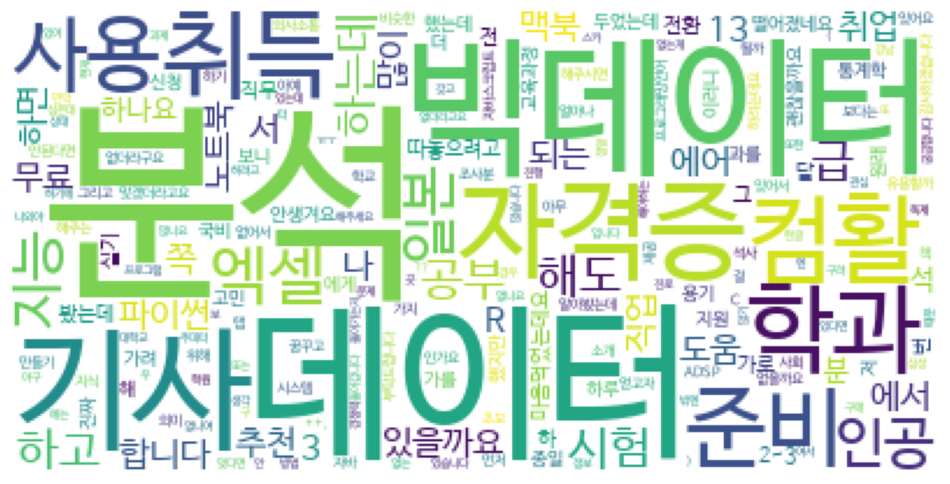

In [29]:
from wordcloud import WordCloud
data = ko.vocab().most_common(300)
print(data)
wordcloud = WordCloud(font_path='./python_machine_learning/data/NanumBarunGothic.ttf',
                      relative_scaling = 0.5,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 연관 단어 추출

In [30]:
# 연관 단어 추출

print(present_text)

컴활 못하는데 데이터분석가 데이터분석가로 직무전환하려고 마음먹었는데요 그전에 컴활 1급 실기 따놓으려고 2~3달 공부하고 6번 시험봤는데 다 떨어졌네요 진짜 하루종일 공부했는데.. 데이터분석 국비지원 신청해두었는데 컴활이 이러니 용기가 안생겨요. 컴활 못해도 데이터분석은 할 수 있을까요?
빅데이터 분석가 고3 학과 고민중인데 인공지능학과에서 빅데이터 분석가를 준비해도 괜찮을까요? 원래 통계학과를 가려했지만 교육과정을 보니 인공지능학과가 저에게 더 맞겠더라고요. 인공지능 시스템을 만들기 보다는 데이터를 가지고 의사소통하는 걸 꿈꾸고 있어요. 데이터학과도 알아봤는데 많이 없더라구요
빅데이터 분석기사 일본 취업 빅데이터 분석기사, 사회조사분석사 2급을 취득하면 일본 취업에 있어서 유용할까요? 의미가 없을까요? 안된다면 일본의 비슷한 자격증을 소개해주시면 감사하겠습니다
빅데이터분석기사 자격증을 준비하려는데요. 아무 지식이 없어서 도움을 얻고자 합니다. 빅데이터분석기사 자격증을 준비하기 위해서 ADSP나... 자격증을 먼저 취득하면 빅데이터분석기사 자격증을 취득하는데 도움이 얼마나 될까요? 그리고 빅데이터분석기사 초보 책 추천부탁드립니다.
빅데이터분석에 사용되는 프로그래밍언어가 파이썬, R, C++, 자바, 자바스크립트인가요?
엑셀 데이터분석 학교에서 무료로 제공해주는 엑셀 사용중인데 데이터분석 탭이 아예 없더라고요ㅠㅜ 무료 엑셀엔 없는 경우가 많나요?? 만약 없는게 맞다면 엑셀을 구매하는 방법밖엔 없나여?
고1 데이터 분석 맥북 에어13 고1 입니다. 데이터 분석 쪽으로 진로를 생각하고 있습니다. 현재 삼성 노트북을 사용 중인데 구려서 주피터 노트북이 잘 안돌아갑니다. 맥북 에어13 데이터 분석하기에 문제 없나요? 또한 한글(구독제)을 사용해야하는 과제가 많기 때문에 프로그램이 잘 돌아가는지 궁금합니다.
야구 스카우터나 데이터 분석 하는 직업을 갖고 싶은데 어떤 학과를 나와야 하나요? 또, 대학교 추천도 해주세요
빅데이터분석기사에 관심이 많습니다 ... 제가 컴활은 

In [35]:

from gensim.models import word2vec
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])

    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


컴활 못 하다 데이터 분석 데이터 분석 가로 직무 전환 하 려고 마음먹다 그 전 컴활 1 급 실기 따다 2~3 달 공부 6 번 시험 보다 다 떨어지다 진짜 하루 종일 공부 하다 데이터 분석 국비 지원 신청 하다 두다 컴활 이러니 용기 안생겨요 컴활 못 하다 데이터 분석 하다 수 있다
빅데이터 분석 고 3 학과 고민 중 인공 지능 학과 빅데이터 분석 가르다 준비 하다 괜찮다 원래 통계학 가다 하다 교육과정 보다 인공 지능 학과 저 더 맞다 인공 지능 시스템 만들기 데이터 가지 의사소통 하다 걸 꿈꾸다 있다 데이터 학과 알아보다 많이 없다
빅데이터 분석 기사 일본 취업 빅데이터 분석 기사 사회 조사분 석사 2 급 취득 하다 일본 취업 있다 유용하다 요 의미 없다 안되다 일본 비슷하다 자격증 소개 해주다 감사하다
빅데이터 분석 기사 자격증 준비 하다 아무 지식 없다 도움 얻다 하다 빅데이터 분석 기사 자격증 준비 하다 위해 ADSP 나 자격증 먼저 취득 하다 빅데이터 분석 기사 자격증 취득 하다 도움 얼마나 되다 요 그리고 빅데이터 분석 기사 초보 책 추천 부탁드리다
빅데이터 분석 사용 되다 프로그래밍언어 파이썬 R C 자바 자바스크립트
엑셀 데이터 분석 학교 무료 제공 해주다 엑셀 사용 중 데이터 분석 탭 아예 없다 ㅠㅜ 무료 엑셀 없다 경우 많다 만약 없다 맞다 엑셀 구매 하다 방법 없다
고 1 데이터 분석 맥북 에어 13 고 1 이다 데이터 분석 쪽 진로 생각 있다 현재 삼성 노트북 사용 중 구려 주피터 노트북 자다 안 돌아가다 맥북 에어 13 데이터 분석 하다 문제 없다 또한 한글 구 독제 사용 하다 과제 많다 때문 프로그램 자다 돌아가다 궁금하다
야구 스카 우 터 데이터 분석 하다 직업 갖다 싶다 어떻다 학과 나오다 하나요 또 대학교 추천 해주다
빅데이터 분 석 기사 관심 많다 제 컴활 취득 상태 빅데이터 분 석 기사 경쟁력 있다 보 취득 하다 하다 빅데이터 분석 기사 시험 파이썬 또는 R 로 진행 되다 강남 쪽 학원 정말 많이 있다 빅데이터 분석 기사 자

In [38]:
data_file = 'moon.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1,min_count=2, sg=1)
model.save('moon.model')
model = word2vec.Word2Vec.load("moon.model")
model.wv.most_similar(positive=['데이터']

[('분석', 0.28501275181770325),
 ('맞다', 0.22073525190353394),
 ('분', 0.2178267240524292),
 ('없다', 0.21362659335136414),
 ('못', 0.19199280440807343),
 ('석', 0.18989671766757965),
 ('취득', 0.18984001874923706),
 ('직업', 0.1858011931180954),
 ('자다', 0.17659908533096313),
 ('13', 0.17435555160045624)]

### 아이템 기반 최근접 이웃 협업 필터링을 이용한 개인화된 영화 추천

In [2]:
import pandas as pd
movies = pd.read_csv('./python_machine_learning/data/movielens/movies.csv')
ratings = pd.read_csv('./python_machine_learning/data/movielens/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


#### 데이터 탐색

In [3]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [5]:
# 영화 정보 확인
# 각 피처의 자료형과 결측치 여부 확인
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
# rating 수정
# 시간은 의미가 없을것 같아 제거
ratings=ratings[['userId','movieId','rating']]
print(ratings)

        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]


In [23]:
# 개인화 된 최근접 이웃 추천 알고리즘에서는 항상 ID를 인덱스로 놓고 아이템을 feature로 한다. ('
# 존재하는 모든 MovieID에 대해 평점을 전부 만들어 낸다. 
ratings_matrix=ratings.pivot_table('rating',index='userId',columns='movieId')
print(ratings_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [27]:
# movieId를 영화 제목으로 변경 - 영화 제목은 movies에 존재. 
# ratings와 Movies를 join(합쳐야 한다.)
rating_movies=pd.merge(ratings,movies,on='movieId')

ratings_matrix=rating_movies.pivot_table('rating',index='userId',columns='title')
ratings_matrix

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   
...                        ...                  ...   
606                        NaN                  NaN   
607                        NaN                  NaN   
608                        NaN                  NaN   
609                        NaN                  NaN   
610                        NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
...                           ...                              ...   
606                           NaN                              NaN   
607                           NaN                              NaN   
608                           NaN                              NaN   
609                           NaN                              NaN   
610                           NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   
...                    ...                   ...                          ...   
606                    NaN                   NaN                          NaN   
607                    NaN                   NaN                          NaN   
608                    NaN                   NaN                          NaN   
609                    NaN                   NaN                          NaN   
610                    NaN                   NaN                          3.5   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  NaN  ...          NaN           NaN   
2                                  NaN  ...          NaN           NaN   
3                                  NaN  ...          NaN           NaN   
4                                  NaN  ...          NaN           NaN   
5                                  NaN  ...          Na

In [28]:
ratings_matrix=ratings_matrix.fillna(0)
print(ratings_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
...            ...                                      ...   
606            0.0                                      0.0   
607            0.0                                      0.0   
608            0.0                                      0.0   
609            0.0                                      0.0   
610            4.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

In [29]:
# 영화간 유사도 산출 - 유사도를 계산할 항목이 인덱스.
ratings_matrix_T=ratings_matrix.transpose()
print(ratings_matrix_T)

userId                                     1    2    3    4    5    6    7    \
title                                                                          
'71 (2014)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Round Midnight (1986)                     0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Salem's Lot (2004)                        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Til There Was You (1997)                  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
eXistenZ (1999)                            0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx (2002)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx: State of the Union (2005)             0.0  0.0  0.0  0.0  0.0  0.0  0.0   
¡Three Amigos! (1986)                      4.0  0.0  0.0  0.0  0.0  0.0  0.0   
À nous la liberté (Freedom for Us) (1931

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim=cosine_similarity(ratings_matrix_T,ratings_matrix_T)
item_sim_df=pd.DataFrame(data=item_sim,index=ratings_matrix.columns,columns=ratings_matrix.columns)
print(item_sim_df)

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                   1.000000   
'Hellboy': The Seeds of Creation (2004)      0.000000   
'Round Midnight (1986)                       0.000000   
'Salem's Lot (2004)                          0.000000   
'Til There Was You (1997)                    0.000000   
...                                               ...   
eXistenZ (1999)                              0.000000   
xXx (2002)                                   0.139431   
xXx: State of the Union (2005)               0.327327   
¡Three Amigos! (1986)                        0.000000   
À nous la liberté (Freedom for Us) (1931)    0.000000   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                                0.000000   


In [35]:
# 영화를 가지고 유사도가 가장 높은 영화를 추천
item_sim_df['Inception (2010)'].sort_values(ascending=False)[:10]
# 자기자신과의 유사도가 가장 높기 때문에 자신을 제외하자. 
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:11]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Interstellar (2014)              0.608150
Up (2009)                        0.606173
Avengers, The (2012)             0.586504
Django Unchained (2012)          0.581342
Departed, The (2006)             0.580849
Name: Inception (2010), dtype: float64

-여기까지는 영화의 유사도를 계산해서 추천한 것이라 개인의 취향은 무시. 
- 개인이 보지 않은 영화의 평점을 0.0으로 설정했는데 보지 않은 영화의 평점을 예측하도록 해서보지 않은 영화중 예측 평점이 가장 높을것으로 기대되는 영화를 추천

### 개인화된 예측 평점 계산
- 아이템과 가장 유사도가 높은 TOP-N개의 아이템의 유사도 벡터 * 사용자의 아이템과 유사도가 높은 TOP-N개의 아이템의 실제 평점 / | 아이템과 가장 유사도가 높은 TOP-N개의 아이템의 유사도 벡터|

- 사용자가 가진 아이템에 대한 실제 평점과 다른 모든 영화와의 코사인 유사도를 내적곱한 값을 전체 합으로 나눔. 

### 사용자가 보지 않은 영화에 대한 평점 계산

In [36]:
#사용자가 본 영화에 대한 실제 평점 과 다른 모든 영화와의 코사인 유사도를 내적 곱한 값을 전체 합으로 나눔 
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [38]:
import numpy as np
#개인화된 예측 평점 확인
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.070345                                 0.577855   
2         0.018260                                 0.042744   
3         0.011884                                 0.030279   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.321696             0.227055   
2                     0.018861             0.000000   
3                     0.064437             0.003762   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                        0.206958                         0.194615   
2                        0.000000                         0.035995   
3                        0.003749                         0.002722   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                 0.249883              0.102542                     0.157084   
2                 0.013413              0.002314                     0.032213   
3                 0.014625              0.002085                     0.005666   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                             0.178197  ...     0.113608      0.181738   
2                             0.014863  ...     0.015640      0.020855   
3                             0.006272  ...     0.006923      0.011665   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1            0.133962                 0.128574   
2            0.020119                 0.015745   
3            0.011800                 0.012225   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                0.006179        
2                                                0.049983        
3                                                0.000000        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1              0.212070    0.192921                        0.136024   
2              0.014876    0.021616                        0.024528   
3              0.008194    0.007017                        0.009229   

title   ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  
userId                                                                    
1                    0.292955                                   0.720347  
2                    0.017563                                   0.000000  
3                    0.010420                                   0.084501  

[3 rows x 9719 columns]

In [ ]:
#평가 확인
from sklearn.metrics import mean_squared_error #  MSE값. ( 오차 제곱합)

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))